# Correlation tests for selected indicators
1. GDP Test

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress, t

In [2]:
# Load the data
file_path = "filtered_data_long.csv"

# Load the data from the CSV file
data = pd.read_csv(file_path)

In [3]:
Dependent_variable_code = "SP.DYN.LE00.IN" # Code for Life expectancy
Independent_variable_code = "NY.GDP.PCAP.CD" # Code for GDP

Independent_variable_name = "GDP per capita"
Independent_variable_short_name = "GDP"
Independent_variable_unit = "USD"

# GDP Test
1. Get the correlation & R^2 value against life expectancy
2. Fit linear regression
3. Get p-val, residuals & confidence interval (95%)
4. Create scatterplot
5. Create plot of residuals

Slope:  0.00024867609348201957
Intercept:  66.85096158940637
R-squared:  0.3341167268669694
R-value:  0.5780283097452662
P-value:  0.0
Standard error:  5.635236647430117e-06
95% Confidence Interval for Slope: (0.000238, 0.000260)


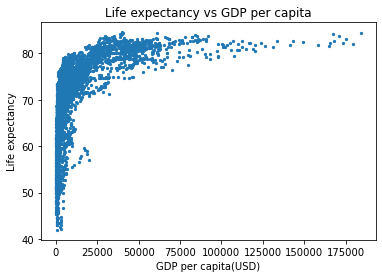

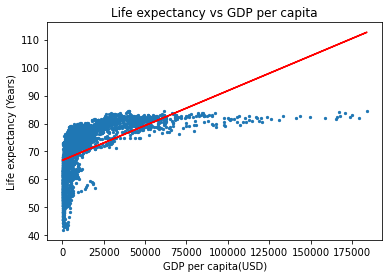

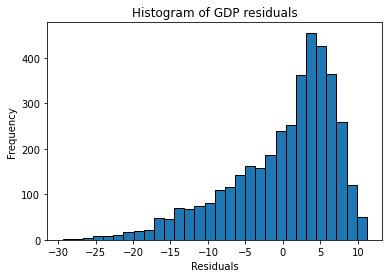

Slope (log):  4.689406802707325
Intercept (log):  30.5669891035705
R-squared (log):  0.6626105960787252
R-value (log):  0.8140089656009479
P-value (log):  0.0
Standard error (log):  0.0537133969480145
95% Confidence Interval for Slope (log): (4.584098, 4.794716)


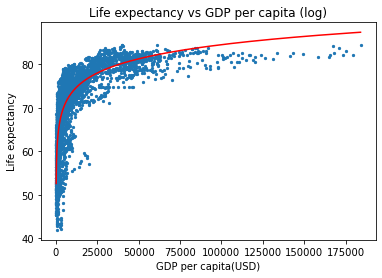

Number of countries:  191


In [4]:

# Get all raw data for the dependent variable
LE_data = data[data["Indicator Code"] == Dependent_variable_code]
# Get all raw data for the independent variable
GDP_data = data[data["Indicator Code"] == Independent_variable_code]

# Join the LE_data and GDP_data on the "Country Code" and "Year" columns
# This makes sure that we have GDP and LE data for the same country and year
GDP_joined_data = pd.merge(GDP_data, LE_data, on=["Country Code", "Year"])

# Drop rows with missing values
# This is necessary because the scatter plot function does not work with missing values
GDP_joined_data = GDP_joined_data.dropna()

# Create array from this data frame in x, y format
# x is GDP per capita
# y is Life expectancy
x = GDP_joined_data["Value_x"]
y = GDP_joined_data["Value_y"]

# Fit Linear Regression and get correlation coefficient, r-squared, p-value, residuals and confidence intervals
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the R-squared value
r_squared = r_value**2


# Calculate degrees of freedom
n = len(x)
df = n - 2

# Critical t-value for 95% confidence level
confidence = 0.95
alpha = 1 - confidence
t_critical = t.ppf(1 - alpha / 2, df)

# Margin of error
margin_of_error = t_critical * std_err

# Confidence interval for the slope
slope_ci_lower = slope - margin_of_error
slope_ci_upper = slope + margin_of_error


# Print the results
print("Slope: ", slope)
print("Intercept: ", intercept)
print("R-squared: ", r_squared)
print("R-value: ", r_value)
print("P-value: ", p_value)
print("Standard error: ", std_err)
print("95% Confidence Interval for Slope: ({:.6f}, {:.6f})".format(slope_ci_lower, slope_ci_upper))


# Scatter plot with smaller dot size (s=5)
plt.scatter(x, y, s=5)
plt.xlabel(Independent_variable_name +"(" + Independent_variable_unit + ")")
plt.ylabel("Life expectancy")
plt.title("Life expectancy vs "+Independent_variable_name)
plt.show()


# Scatter plot with linear regression line
plt.scatter(x, y, s=5)
plt.plot(x, slope*x + intercept, color="red")
plt.xlabel(Independent_variable_name +"(" + Independent_variable_unit + ")")
plt.ylabel("Life expectancy (Years)")
plt.title("Life expectancy vs "+Independent_variable_name)
plt.show()

# Plot the residuals in histogram, show some lines between the bars
residuals = y - (slope*x + intercept)
plt.hist(residuals, bins=30, edgecolor="black")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of "+Independent_variable_short_name+" residuals")
plt.show()

# Log transformation of x (GDP per capita)
log_x = np.log(x)

# Fit log-linear regression
slope_log, intercept_log, r_value_log, p_value_log, std_err_log = linregress(log_x, y)

# Calculate R-squared for log regression
r_squared_log = r_value_log**2

# Calculate degrees of freedom
n = len(x)
df_log = n - 2

# Critical t-value for 95% confidence level
confidence = 0.95
alpha = 1 - confidence
t_critical_log = t.ppf(1 - alpha / 2, df_log)

# Margin of error for slope
margin_of_error_log = t_critical_log * std_err_log

# Confidence interval for the slope
slope_ci_lower_log = slope_log - margin_of_error_log
slope_ci_upper_log = slope_log + margin_of_error_log

# Print the regression results
print("Slope (log): ", slope_log)
print("Intercept (log): ", intercept_log)
print("R-squared (log): ", r_squared_log)
print("R-value (log): ", r_value_log)
print("P-value (log): ", p_value_log)
print("Standard error (log): ", std_err_log)
print("95% Confidence Interval for Slope (log): ({:.6f}, {:.6f})".format(slope_ci_lower_log, slope_ci_upper_log))

sorted_indices = np.argsort(x)
x_sorted = x[sorted_indices]

# Plot scatter plot and single clean regression line
plt.scatter(x, y, s=5)
plt.plot(x_sorted, slope_log * np.log(x_sorted) + intercept_log, color="red")
plt.xlabel(Independent_variable_name +"(" + Independent_variable_unit + ")")
plt.ylabel("Life expectancy")
plt.title("Life expectancy vs "+Independent_variable_name+" (log)")
plt.show()


print("Number of countries: ",len(np.unique(GDP_data["Country Code"])))